<Axes: xlabel='timestep'>

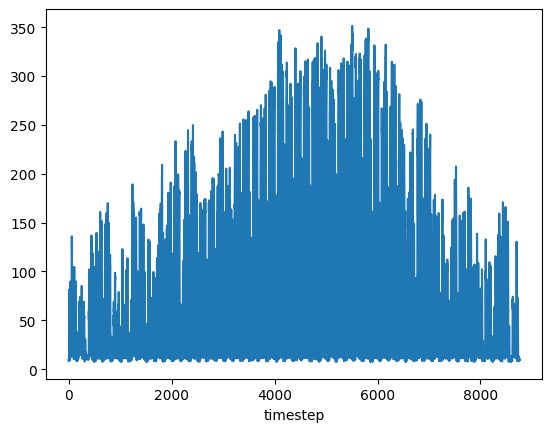

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'preprocessed/electricity_load_profile.csv'
data = pd.read_csv(file_path)
data = data.rename(columns={data.columns[0]: 'timestep'}).set_index('timestep')
target_column = 'Load [kWh]'
time_series = data[target_column]
time_series.plot()

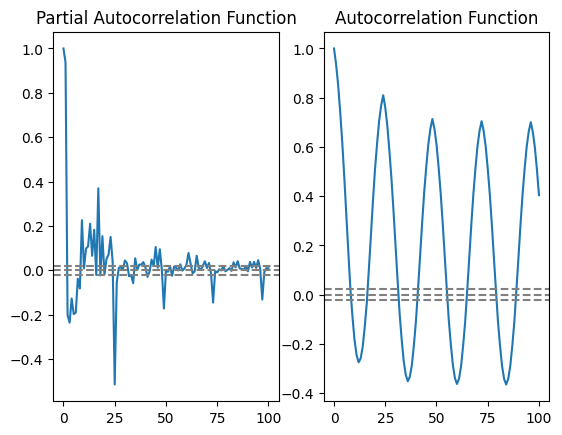

In [74]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import pacf, acf
from sklearn.metrics import mean_squared_error

# Determine the order of the ARIMA model using PACF and ACF
lag_pacf = pacf(time_series, nlags=100, method='ols')
lag_acf = acf(time_series, nlags=100)

# Plot PACF and ACF to find the order of the AR and MA components
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(time_series)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(time_series)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(time_series)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(time_series)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.show()

# Set the order of the ARIMA model based on the PACF and ACF plots
p = 1  # Replace with the appropriate value based on the PACF plot
q = 1  # Replace with the appropriate value based on the ACF plot
d = 0  # Usually set to 0 or 1

# Fit the ARIMA model
model = ARIMA(time_series, order=(p, d, q))
model_fit = model.fit()

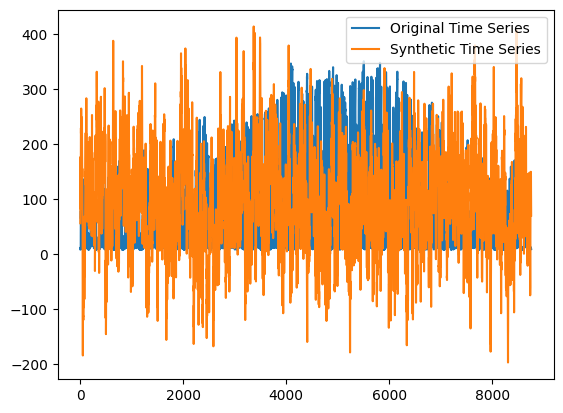

In [75]:
# Generate synthetic time series data using the ARIMA model
n = len(time_series)
synthetic_data = model_fit.simulate(n)

# Plot the original and synthetic time series data
plt.plot(time_series, label='Original Time Series')
plt.plot(synthetic_data, label='Synthetic Time Series')
plt.legend()
plt.show()